In [14]:
import matplotlib.pyplot as plt 

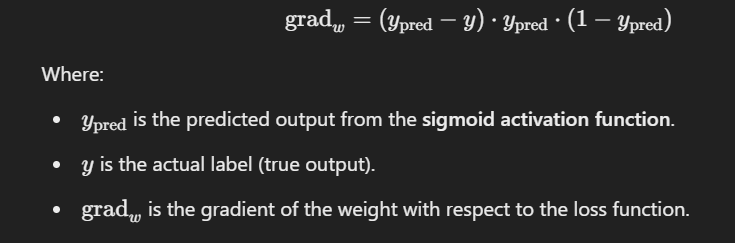

In [15]:
class sigmoidneuron:
    def __init__(self):
        self.w = None
        self.b = None
    def perceptron(self,x):
        return np.dot(x,self.w.T) + self.b # x1*w1 + x2w2 +....+ xnwn + b , T - w and x same shape row to colom
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1- y_pred)
    

    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1- y_pred)
    
    
    def fit(self,x,y,epochs,learning_rate, initialise = True,display_loss = False):
        # initialise w,b
        if initialise:            # initialise=False, it assumes that self.w and self.b were already set before calling fit().
            self.w = np.random.randn(1,x.shape[1]) # x feature same w [1] x feature
            self.b = 0

        if display_loss: # display_loss=True, we want to track the loss values during training
            loss = {}    # Initializing loss = {} means we are creating an empty dictionary that will store loss values

        for epoch in range(epochs):  #tqdm_notebook (range(epochs),total = epochs,unit = "epoch"):
            dw = 0
            db = 0
            for xi,yi in zip (x,y):
                dw += self.grad_w(xi,yi)  # ewach x and y execute rotate # Compute gradient for weights , += operator in Python is addition and assignment.
                db += self.grad_b(xi,yi)  # Compute gradient for bias

            self.w -= learning_rate*dw       # self.w = self.w - learning rate * dw ,-= subtraction and assignment
            self.b -=learning_rate*db   

            if display_loss:
                y_pred = self.sigmoid(self.perceptron(x))
                loss[i] = mean_squared_error(y_pred,y)    # stores (MSE) loss at index i inside the loss dictionary.i epoch number


            if display_loss:
                plt.plot(loss.values())
                plt.xlabel ("epochs")
                plt.ylabel ("Mean squared error")
                plt.show()


            def predict (self,x):
                predictions  = []    # y_pred = [] initializes an empty list that will store predicted values
                for xi in x :
                    y_hat = self.sigmoid(self.perceptron(xi))
                    predictions.append(xi,y_hat)

                return np.array(predictions)

            

    


In [16]:
import numpy as np
x = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
               
y = [1,1,1,0,0,0]

In [17]:
sn = sigmoidneuron()
sn.fit(x,y,1,0.25,True)

In [18]:
def plot_sn (x,y,sn,ax):
    x1 = np.linspace(-10,10,100)
    x2 = np.linspace(-10,10,100)
    xx1,xx2 = np.meshgrid(x1,x2)
    yy = np.zeros(xx1.shape)
    for i in range (x2.size):
        for j in range(x1.size):
            val = np.asarray([x1[j],x2[i]])
            yy[i,j] = sn.sigmoid(sn.perceptron(val))

        ax.contourf(xx1,xx2,yy,cmap = my_cmap , alpha = 0.6)
        ax.scatter(x[:,0],x[:,1],c = y , cmap = my_cmap)
        ax.plot()


In [19]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

[[1.0369909  0.41206716]] [0.00515707]


C:\Users\admin\AppData\Local\Temp\ipykernel_16284\3187382774.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yy[i,j] = sn.sigmoid(sn.perceptron(val))


[[1.08923554 0.4643118 ]] [0.05740171]
[[1.14716573 0.52224199]] [0.1153319]
[[1.20919805 0.58427432]] [0.17736422]
[[1.27350537 0.64858164]] [0.24167154]
[[1.33836364 0.7134399 ]] [0.30652981]
[[1.4023721  0.77744837]] [0.37053827]
[[1.46452431 0.83960058]] [0.43269048]
[[1.52417875 0.89925502]] [0.49234492]
[[1.58098579 0.95606206]] [0.54915196]
[[1.6348079  1.00988417]] [0.60297407]
[[1.68565053 1.06072679]] [0.6538167]
[[1.73360878 1.10868504]] [0.70177494]
[[1.77882926 1.15390552]] [0.74699542]
[[1.82148422 1.19656048]] [0.78965039]
[[1.86175478 1.23683104]] [0.82992095]
[[1.89982059 1.27489686]] [0.86798676]
[[1.9358538  1.31093007]] [0.90401997]
[[1.97001586 1.34509212]] [0.93818203]
[[2.00245607 1.37753233]] [0.97062224]
[[2.03331132 1.40838758]] [1.00147749]
[[2.06270635 1.43778261]] [1.03087251]
[[2.09075446 1.46583073]] [1.05892063]
[[2.11755839 1.49263466]] [1.08572456]
[[2.14321118 1.51828744]] [1.11137735]
[[2.16779709 1.54287336]] [1.13596326]
[[2.19139252 1.56646878]] [

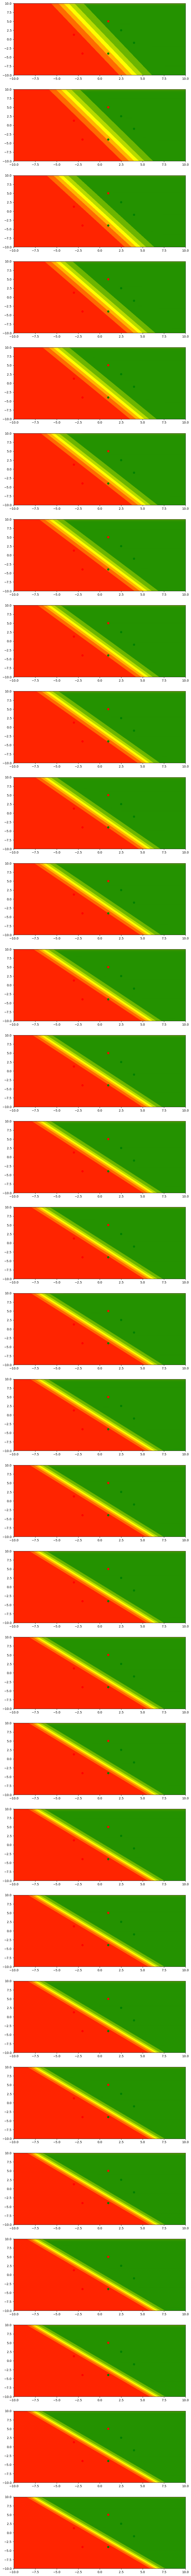

In [20]:

sn.fit(x, y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(x, y, sn, ax)
    sn.fit(x, y, 1, 0.5, False)

In [21]:
import pandas as pd 

In [22]:
link = "https://raw.githubusercontent.com/Likhitha9reddy/PadhAI/master/mobile_cleaned.csv"

In [23]:
df = pd.read_csv(link)
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [24]:
x = df.drop("is_liked",axis = 1)
y = df["is_liked"].values

In [25]:
threshold = 4.2  
df['Class'] = (df['is_liked'] >= threshold).astype(int)  # Use `int` instead of `np.int`

df['Class'].value_counts(normalize=True)  

Y_binarised = df['Class'].values

# Standization

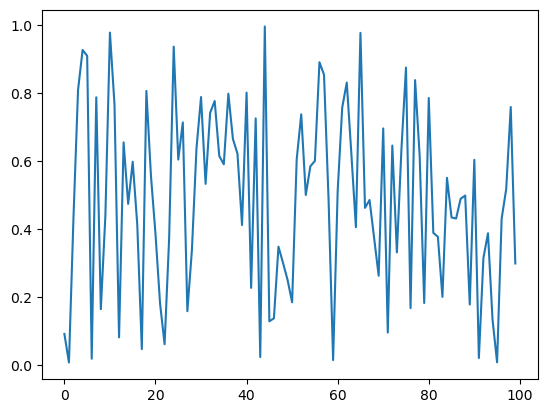

In [26]:
R = np.random.random([100,1])

plt.plot(R)
plt.show()

In [27]:
np.mean(R)

0.48985165402649095

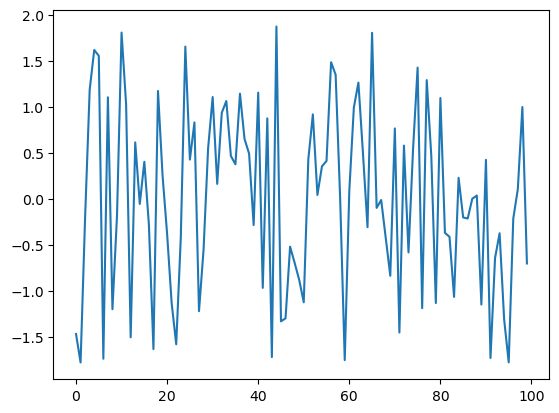

In [28]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming R is your data (e.g., a numpy array or similar)
scaler = StandardScaler()

scaler.fit(R)

scaler.mean_  # This will now work, as StandardScaler is defined

RT = scaler.transform(R)

np.mean(RT)

np.std(RT)

# Plotting the standardized data
plt.plot(RT)
plt.show()

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0, stratify=Y_binarised)

# Printing the shapes of the training and testing sets
print(X_train.shape, X_test.shape)

# Standardizing the training and testing data
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

(81, 39) (28, 39)


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Scale the training labels using MinMaxScaler
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

# Check the minimum value of the scaled training labels
np.min(Y_scaled_train)

# Scale the testing labels using the same MinMaxScaler
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

# Scale the threshold value using the same MinMaxScaler
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

# Print the scaled threshold
scaled_threshold

# Binarize the scaled training labels based on the scaled threshold
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

In [35]:


# Initialize and train the SigmoidNeuron
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss=False)

# Predict on training and testing data
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

# Binarize the predictions
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

# Calculate accuracy
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

print(f"Training Accuracy: {accuracy_train}")
print(f"Testing Accuracy: {accuracy_test}")

Training Accuracy: 1.0
Testing Accuracy: 1.0
